![Impacts of Covid-19 in Michigan](coronavirusInMich.jpg)

### Data obtained from [The Covid Tracking Project at "The Atlantic"](https://covidtracking.com/data/download)

<span style="color: red;"><b>Below is the dataset downloaded from the link found above. It describes the health impact that Covid-19 has had on Michigan from March 1 to November 14, 2020.</b></span>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style = "white",palette = "dark")
import matplotlib.pyplot as plt

#Reading the michigan-history.csv and converting it into a dataframe.
michCovData = pd.read_csv('michigan-history.csv')
michCovData


,date,death,deathConfirmed,deathIncrease,deathProbable,hospitalizedCurrently,inIcuCurrently,negative,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
0,3/1/2020,NaN,0.0,0,0,NaN,NaN,NaN,0,NaN,14,0,NaN,14,0
1,3/2/2020,NaN,NaN,0,0,NaN,NaN,NaN,0,NaN,27,13,NaN,27,13
2,3/3/2020,NaN,NaN,0,0,NaN,NaN,NaN,0,NaN,50,23,NaN,50,23
3,3/4/2020,NaN,0.0,0,0,NaN,NaN,NaN,0,NaN,74,24,NaN,74,24
4,3/5/2020,NaN,0.0,0,0,NaN,NaN,8.0,8,NaN,100,26,NaN,108,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,11/10/2020,8094.0,7724.0,86,370,2959.0,595.0,5182373.0,52371,257.0,245252,6944,128981.0,5427625,59315
255,11/11/2020,8136.0,7766.0,42,370,3093.0,604.0,5230604.0,48231,263.0,251872,6620,128981.0,5482476,54851
256,11/12/2020,8185.0,7811.0,49,374,3209.0,628.0,5290609.0,60005,253.0,259183,7311,128981.0,5549792,67316
257,11/13/2020,8308.0,7929.0,123,379,3241.0,660.0,5354790.0,64181,272.0,268362,9179,128981.0,5623152,73360


In [3]:
##Converting & copying .csv to .xls spreadsheet
michCovData.to_excel('michiganCovidData2020.xlsx', sheet_name='Michigan 2020')

### The Number of Deaths from Covid-19 Each Day in Michigan  From 3/31/2020 To 11/14/2020

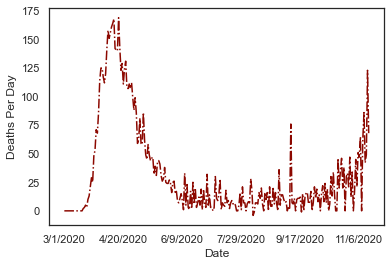

In [4]:
michCovDataDbD = michCovData[["date","deathIncrease"]]

michCovDataDbD.plot(x="date", y="deathIncrease",xlabel="Date"
                    ,ylabel="Deaths Per Day",color='r',linestyle='-.',legend = False);

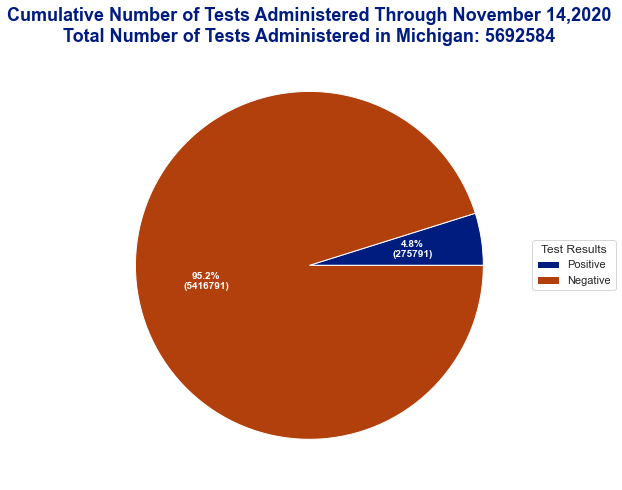

In [5]:
fig, ax = plt.subplots(figsize=(10,8), subplot_kw=dict(aspect="equal"))
testResComp = michCovData[['positive','negative']]
testResCompLbls = ('Positive','Negative')
testResComp = testResComp.iloc[-1]
data = [testResComp['positive'],testResComp['negative']]
totalTests = testResComp['positive'] + testResComp['negative']
ax.set_title("Cumulative Number of Tests Administered Through November 14,2020\n"+
             "Total Number of Tests Administered in Michigan: " + str(int(totalTests)),color='b',
            fontsize=18, fontweight='bold')
#Code reference: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)
    
    
wedges,autotexts, texts = ax.pie(data,autopct = lambda pct: func(pct,data),
                                  textprops=dict(color="w",size=10,fontweight='bold'))

ax.legend(wedges, testResCompLbls,
          title="Test Results",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=6, weight="normal");




#### <span style="color: red">Statistical Analysis on How Many People Have Been Hospitalized, in ICU's, on Ventilators, & Have Recovered From Covid-19 in Michigan</span>

In [6]:
#Using the describe function of pandas to show statistical analysis of how
#many people have been hospitalized, in ICU's, on ventilators, and have recovered from Covid-19.
#While some precision is lost with round, partial people do not exist in the real
#world, so I am choosing to round the outputs here.

hospital = michCovData[['hospitalizedCurrently','inIcuCurrently','onVentilatorCurrently','recovered']]
round(hospital.describe(percentiles = [.05,.25,.75,.95]))
    

,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,recovered
count,220.0,220.0,220.0,226.0
mean,1171.0,394.0,263.0,60282.0
std,928.0,362.0,323.0,36169.0
min,471.0,137.0,50.0,56.0
5%,505.0,150.0,62.0,488.0
25%,617.0,184.0,90.0,34401.0
50%,690.0,230.0,120.0,55162.0
75%,1330.0,454.0,250.0,89040.0
95%,3413.0,1346.0,1107.0,121093.0
max,3986.0,1663.0,1441.0,138862.0


<span style="color: red"><b>The information below shows us that since the beginning of the pandemic's hold in Michigan (through November 14, 2020), April 13, 2020 was the date when the highest number of Michiganders were hospitalized with Covid-19.</b></span>

In [7]:

#Shows the info for the day when the most number of people in Michigan were hospitalized:
mostHospitalizations = michCovData['hospitalizedCurrently']
mostest = mostHospitalizations.max()
mostHospitalizations = michCovData[['date','hospitalizedCurrently']]
mostHosp = mostHospitalizations[mostHospitalizations['hospitalizedCurrently']== mostest]
mostHosp



,date,hospitalizedCurrently
43,4/13/2020,3986.0


<span style="color: red"><b>Below is a comparison of the number of people who have been hospitalized since March 1, 2020 versus those who were hospitalized and in the ICU versus those who were also put on ventilators.</b></span> 

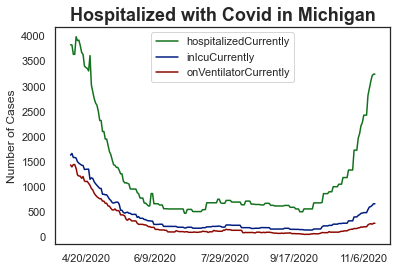

In [8]:
cHIVR=michCovData[['date','hospitalizedCurrently','inIcuCurrently',
                   'onVentilatorCurrently']]
ax = cHIVR.plot(x='date',xlabel="", ylabel="Number of Cases", color=('g','b','r'));
ax.set_title("Hospitalized with Covid in Michigan",fontsize=18, fontweight='bold');

#### <span style="color: red"><b>Comparision of Deaths Versus Recovered</b></span>


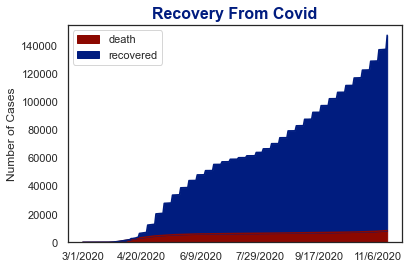

In [9]:
deathVRec = michCovData[['date','death','recovered']]
ax = deathVRec.plot.area(x='date',xlabel='',color= ('r','b'),ylabel='Number of Cases');
ax.set_title("Recovery From Covid",fontsize=16,fontweight='bold',color='b');


#### <span style="color: red"><b>Comparision of Number of People in ICU with Daily Death Increase</b></span>

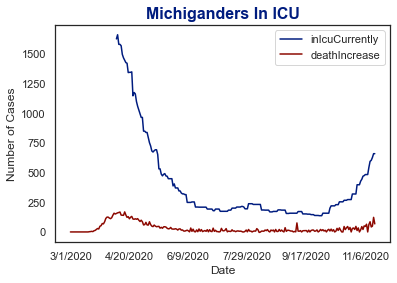

In [10]:
ax=michCovData[['date','inIcuCurrently','deathIncrease']].plot.line(x='date',xlabel="Date", ylabel="Number of Cases",color=('b','r'))
ax.set_title("Michiganders In ICU", fontsize=16, fontweight='bold', color='b');

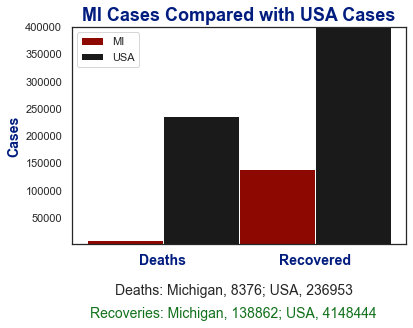

In [11]:
#Read in national data to compare how Michigan's data compares
usaCovData = pd.read_csv('national-history-3_1-11-14.csv')

#Create bar charts to compare how Michigan's total deaths compares to national deaths.
#Get the data for both mich and nationally.
michTotDeaths = int(michCovData.iloc[-1]['death'])
usaTotDeath = int(usaCovData.iloc[-1]['death'])

#Get total number of people who recovered from covid in Michigan.
michRecov = michCovData['recovered'].iloc[-1]
michRecov = int(michRecov)

#Get total number of people who recovered from covid in USA
usaRecov = usaCovData['recovered'].iloc[-1]
usaRecov = int(usaRecov)

#Creating a bar chart to show the comparision of Mich vs. Nat'l
michD = (michTotDeaths, michRecov)
natD = (usaTotDeath, usaRecov)
comp = np.arange(2)
width = 0.50
plt.bar(comp, michD, width, label = 'MI', color = 'r')
plt.bar(comp + width, natD, width, label = 'USA', color = 'k')
plt.ylabel('Cases', color='b', fontweight='bold', fontsize = 14)
plt.title('MI Cases Compared with USA Cases', fontsize = 18, fontweight='bold', color='b')
plt.xticks(comp + width/2, ('Deaths','Recovered'),color='b', fontweight='bold', fontsize = 14)
plt.ylim(1000,400000)
plt.figtext(0.5, -0.05,"Deaths: Michigan, " + str(michTotDeaths) +"; USA, "+ str(usaTotDeath), wrap=True,
            horizontalalignment='center', fontsize=14)
plt.figtext(0.5, -0.13,"Recoveries: Michigan, " + str(michRecov) +"; USA, "+ str(usaRecov), wrap=True,
            horizontalalignment='center', fontsize=14,color = 'g')
plt.legend(loc = 'best')
plt.show();
